In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# load the bank Data dataset 
bank = pd.read_csv(r"C:\Users\dell\Downloads\bank.csv", header=0)

# copy to back-up file

bank_BK =bank.copy()

# Display the first 5 records

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Display the dataset information

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# Displaying Duplicate values with in dataset

bank_dup = bank[bank.duplicated(keep='last')]
bank_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [5]:
# Remove the identified duplicate records 

bank =bank.drop_duplicates()

# Display the shape of the dataset

bank.shape

(11162, 17)

In [6]:
# Re-setting the row index

bank =bank.reset_index(drop=True)

In [7]:
# Display the unique values of the all the variables

bank.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [8]:
# Display the missing values information of variables

bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
# Display the marital varibale count

bank['marital'].value_counts(sort=False)

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [10]:
bank['marital'] = bank['marital'].str.replace('married', '1')
bank['marital'] = bank['marital'].str.replace('single', '2')
bank['marital'] = bank['marital'].str.replace('divorced', '3')
bank['marital'] = bank['marital'].astype(int)

In [11]:
# Display the education varibale count

bank['education'].value_counts(sort=False)

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [12]:
bank['education'] = bank['education'].str.replace('secondary','1')
bank['education'] = bank['education'].str.replace('tertiary','2')
bank['education'] = bank['education'].str.replace('primary','3')
bank['education'] = bank['education'].str.replace('unknown','4')
bank['education'] = bank['education'].astype(int)

In [13]:
# Display the default varibale count

bank['default'].value_counts(sort=False)

no     10994
yes      168
Name: default, dtype: int64

In [14]:
bank['default'] = bank['default'].str.replace('no','1')
bank['default'] = bank['default'].str.replace('yes','2')
bank['default'] = bank['default'].astype(int)

In [15]:
# Display the housing varibale count

bank['housing'].value_counts(sort=False)

yes    5281
no     5881
Name: housing, dtype: int64

In [16]:
bank['housing'] = bank['housing'].str.replace('yes','1')
bank['housing'] = bank['housing'].str.replace('no','2')
bank['housing'] = bank['housing'].astype(int)

In [17]:
# Display the loan varibale count

bank['loan'].value_counts(sort=False)

no     9702
yes    1460
Name: loan, dtype: int64

In [18]:
bank['loan'] = bank['loan'].str.replace('no','1')
bank['loan'] = bank['loan'].str.replace('yes','2')
bank['loan'] = bank['loan'].astype(int)

In [19]:
# Display the contact varibale count

bank['contact'].value_counts(sort=False)

unknown      2346
cellular     8042
telephone     774
Name: contact, dtype: int64

In [20]:
bank['contact'] = bank['contact'].str.replace('unknown','1')
bank['contact'] = bank['contact'].str.replace('cellular','2')
bank['contact'] = bank['contact'].str.replace('telephone','3')
bank['contact'] = bank['contact'].astype(int)

In [21]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,1,1,2343,1,1,1,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,1,1,1,45,2,1,1,5,may,1467,1,-1,0,unknown,yes
2,41,technician,1,1,1,1270,1,1,1,5,may,1389,1,-1,0,unknown,yes
3,55,services,1,1,1,2476,1,1,1,5,may,579,1,-1,0,unknown,yes
4,54,admin.,1,2,1,184,2,1,1,5,may,673,2,-1,0,unknown,yes


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in bank.columns:
    if bank[col].dtype=='object':
        bank[col]=le.fit_transform(bank[col])

In [23]:
# Identify the independent and Target variables

IndepVar = []
for col in bank.columns:
    if col != 'deposit':
        IndepVar.append(col)

TargetVar = 'deposit'

x = bank[IndepVar]
y = bank[TargetVar]

In [24]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [26]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [27]:
projectresults = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\projectresults.csv", header=0)
projectresults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1252  355]
 [ 380 1362]]
Outcome values : 
 1252 355 380 1362
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.78      0.77      1607
           0       0.79      0.78      0.79      1742

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Accuracy : 78.1 %
Precision : 76.7 %
Recall : 77.9 %
F1 Score : 0.773
Specificity or True Negative Rate : 78.2 %
Balanced Accuracy : 78.0 %
roc_auc_score: 0.78


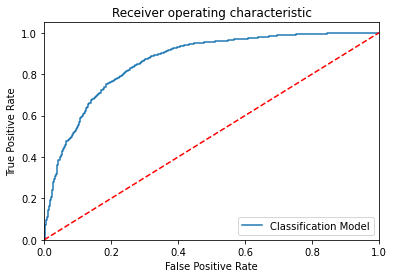

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1261  346]
 [ 498 1244]]
Outcome values : 
 1261 346 498 1244
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75      1607
           0       0.78      0.71      0.75      1742

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349

Accuracy : 74.8 %
Precision : 71.7 %
Recall : 78.5 %
F1 Score : 0.749
Specificity or True Negative Rate : 71.4 %
Balanced Accuracy : 75.0 %
roc_auc_score: 0.749


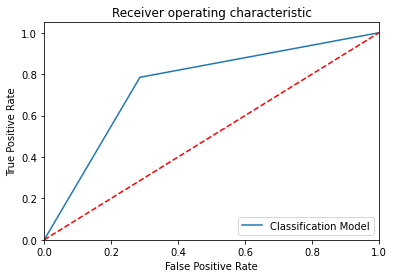

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1479  128]
 [ 466 1276]]
Outcome values : 
 1479 128 466 1276
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.92      0.83      1607
           0       0.91      0.73      0.81      1742

    accuracy                           0.82      3349
   macro avg       0.83      0.83      0.82      3349
weighted avg       0.84      0.82      0.82      3349

Accuracy : 82.3 %
Precision : 76.0 %
Recall : 92.0 %
F1 Score : 0.833
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 82.6 %
roc_auc_score: 0.826


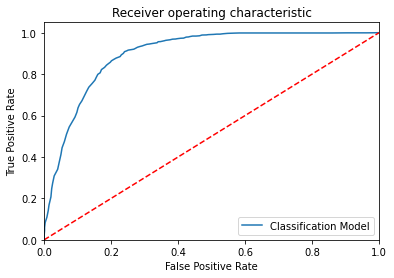

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1434  173]
 [ 412 1330]]
Outcome values : 
 1434 173 412 1330
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.89      0.83      1607
           0       0.88      0.76      0.82      1742

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.82      3349

Accuracy : 82.5 %
Precision : 77.7 %
Recall : 89.2 %
F1 Score : 0.831
Specificity or True Negative Rate : 76.3 %
Balanced Accuracy : 82.8 %
roc_auc_score: 0.828


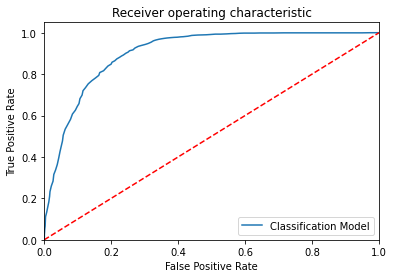

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1019  588]
 [ 344 1398]]
Outcome values : 
 1019 588 344 1398
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.63      0.69      1607
           0       0.70      0.80      0.75      1742

    accuracy                           0.72      3349
   macro avg       0.73      0.72      0.72      3349
weighted avg       0.72      0.72      0.72      3349

Accuracy : 72.2 %
Precision : 74.8 %
Recall : 63.4 %
F1 Score : 0.686
Specificity or True Negative Rate : 80.3 %
Balanced Accuracy : 71.8 %
roc_auc_score: 0.718


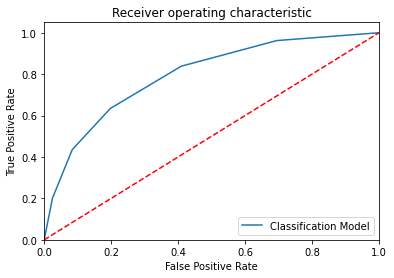

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[1330  277]
 [ 378 1364]]
Outcome values : 
 1330 277 378 1364
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.83      0.80      1607
           0       0.83      0.78      0.81      1742

    accuracy                           0.80      3349
   macro avg       0.80      0.81      0.80      3349
weighted avg       0.81      0.80      0.80      3349

Accuracy : 80.4 %
Precision : 77.9 %
Recall : 82.8 %
F1 Score : 0.802
Specificity or True Negative Rate : 78.3 %
Balanced Accuracy : 80.6 %
roc_auc_score: 0.805


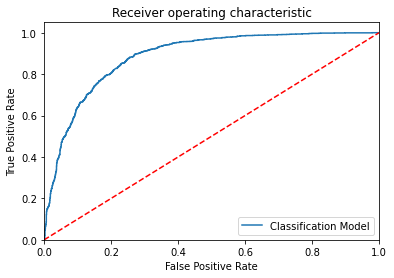

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[1484  123]
 [ 469 1273]]
Outcome values : 
 1484 123 469 1273
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.92      0.83      1607
           0       0.91      0.73      0.81      1742

    accuracy                           0.82      3349
   macro avg       0.84      0.83      0.82      3349
weighted avg       0.84      0.82      0.82      3349

Accuracy : 82.3 %
Precision : 76.0 %
Recall : 92.3 %
F1 Score : 0.834
Specificity or True Negative Rate : 73.1 %
Balanced Accuracy : 82.7 %
roc_auc_score: 0.827


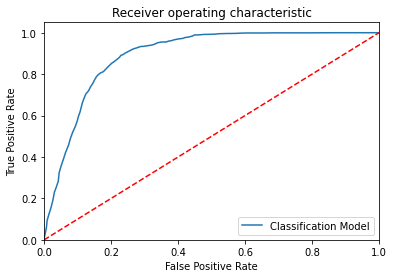

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[1458  149]
 [ 438 1304]]
Outcome values : 
 1458 149 438 1304
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.91      0.83      1607
           0       0.90      0.75      0.82      1742

    accuracy                           0.82      3349
   macro avg       0.83      0.83      0.82      3349
weighted avg       0.84      0.82      0.82      3349

Accuracy : 82.5 %
Precision : 76.9 %
Recall : 90.7 %
F1 Score : 0.832
Specificity or True Negative Rate : 74.9 %
Balanced Accuracy : 82.8 %
roc_auc_score: 0.828


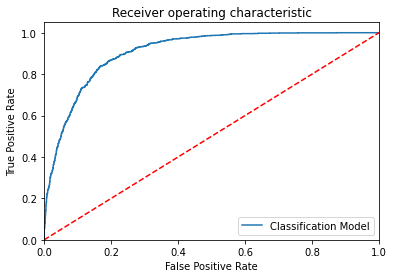

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[1505  102]
 [ 443 1299]]
Outcome values : 
 1505 102 443 1299
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.94      0.85      1607
           0       0.93      0.75      0.83      1742

    accuracy                           0.84      3349
   macro avg       0.85      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349

Accuracy : 83.7 %
Precision : 77.3 %
Recall : 93.7 %
F1 Score : 0.847
Specificity or True Negative Rate : 74.6 %
Balanced Accuracy : 84.2 %
roc_auc_score: 0.841


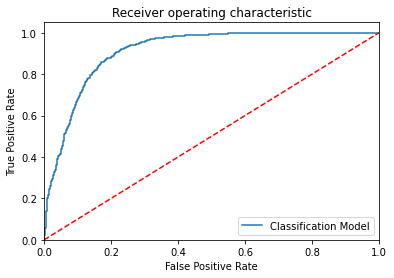

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1334  273]
 [ 546 1196]]
Outcome values : 
 1334 273 546 1196
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.83      0.77      1607
           0       0.81      0.69      0.74      1742

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.75      3349

Accuracy : 75.5 %
Precision : 71.0 %
Recall : 83.0 %
F1 Score : 0.765
Specificity or True Negative Rate : 68.7 %
Balanced Accuracy : 75.8 %
roc_auc_score: 0.758


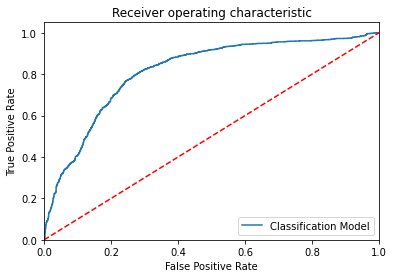

-----------------------------------------------------------------------------------------------------


In [28]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
     #Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    projectresults = projectresults.append(new_row, ignore_index=True)

In [29]:
projectresults.head(10)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,LogisticRegression(),NaN,NaN,NaN,NaN,0.781,0.767,0.779,0.773,0.782,0.561,0.780476,0.78,355.0,380.0,1362.0,1252.0
1,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,0.748,0.717,0.785,0.749,0.714,0.499,0.749407,0.75,346.0,498.0,1244.0,1261.0
2,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,NaN,0.823,0.76,0.92,0.833,0.732,0.661,0.82642,0.826,128.0,466.0,1276.0,1479.0
3,"(ExtraTreeClassifier(random_state=564070303), ...",NaN,NaN,NaN,NaN,0.825,0.777,0.892,0.831,0.763,0.659,0.827918,0.828,173.0,412.0,1330.0,1434.0
4,KNeighborsClassifier(),NaN,NaN,NaN,NaN,0.722,0.748,0.634,0.686,0.803,0.444,0.718313,0.718,588.0,344.0,1398.0,1019.0
5,SVC(probability=True),NaN,NaN,NaN,NaN,0.804,0.779,0.828,0.802,0.783,0.61,0.805319,0.806,277.0,378.0,1364.0,1330.0
6,(DecisionTreeClassifier(random_state=160145219...,NaN,NaN,NaN,NaN,0.823,0.76,0.923,0.834,0.731,0.663,0.827115,0.827,123.0,469.0,1273.0,1484.0
7,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,NaN,NaN,0.825,0.769,0.907,0.832,0.749,0.661,0.827923,0.828,149.0,438.0,1304.0,1458.0
8,LGBMClassifier(),NaN,NaN,NaN,NaN,0.837,0.773,0.937,0.847,0.746,0.691,0.841111,0.842,102.0,443.0,1299.0,1505.0
9,GaussianNB(),NaN,NaN,NaN,NaN,0.755,0.71,0.83,0.765,0.687,0.52,0.758343,0.758,273.0,546.0,1196.0,1334.0


Text(0.5, 0, 'Attributes')

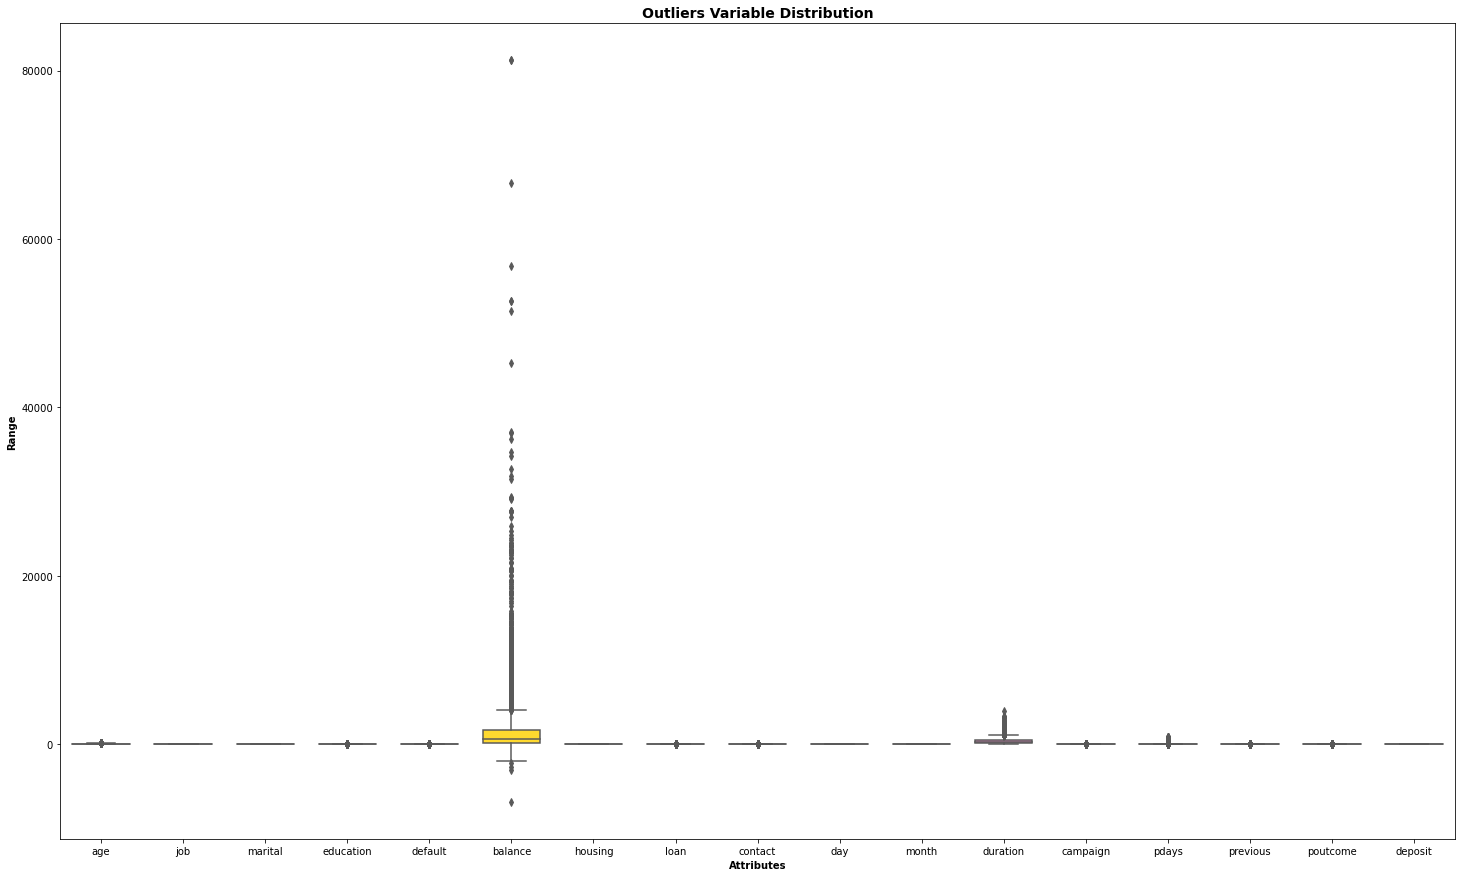

In [30]:
# Outlier Analysis of TotalPrice, Frequency and Recency

import seaborn as sns

variables =['age', 'job', 'marital', 'education',
       'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit']
plt.rcParams['figure.figsize'] = [25,15]
sns.boxplot( data=bank[variables],orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [32]:
col=['age', 'job', 'marital', 'education',
       'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit']


<AxesSubplot:xlabel='age', ylabel='count'>

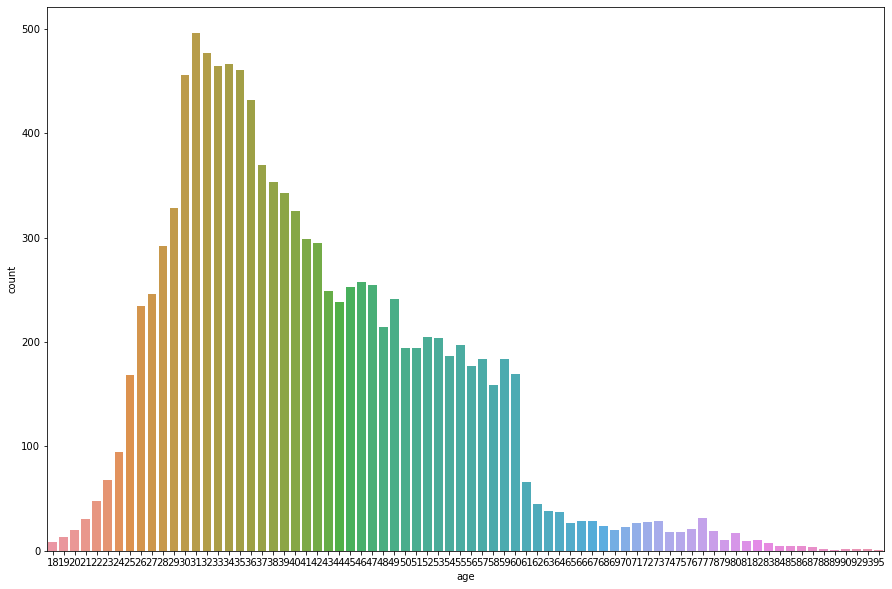

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(data = bank, x = col[0])

<AxesSubplot:xlabel='job', ylabel='count'>

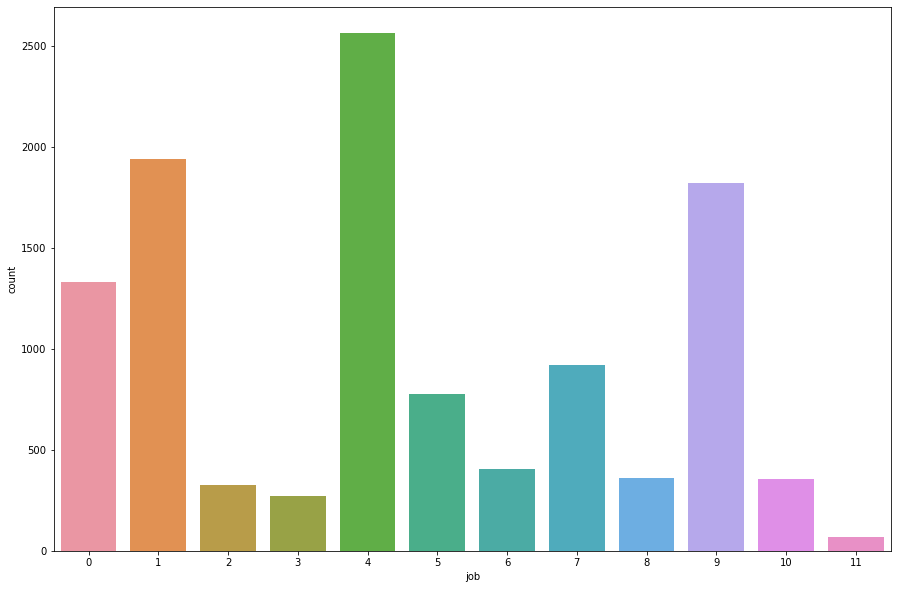

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data = bank, x = col[1])

<AxesSubplot:xlabel='marital', ylabel='count'>

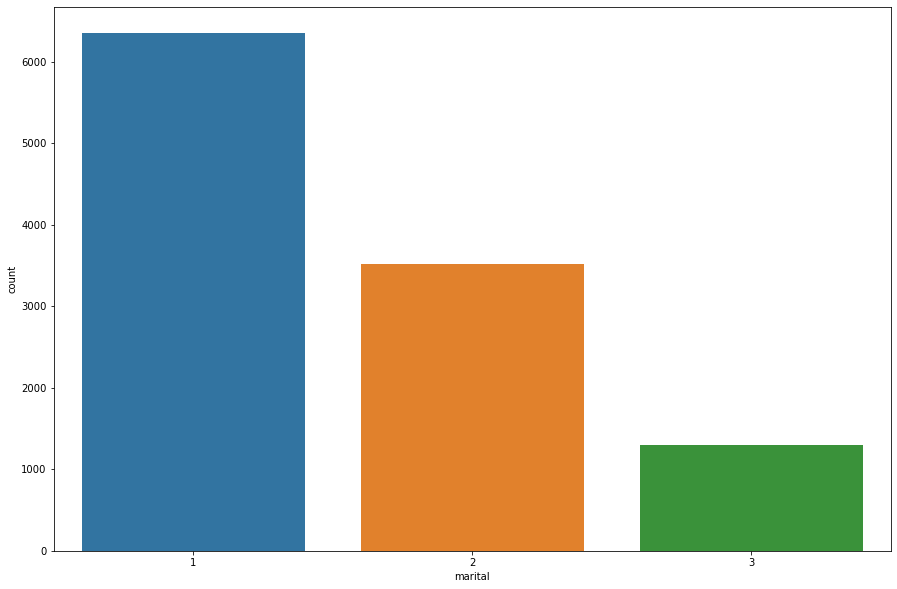

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data = bank, x = col[2])

<AxesSubplot:xlabel='education', ylabel='count'>

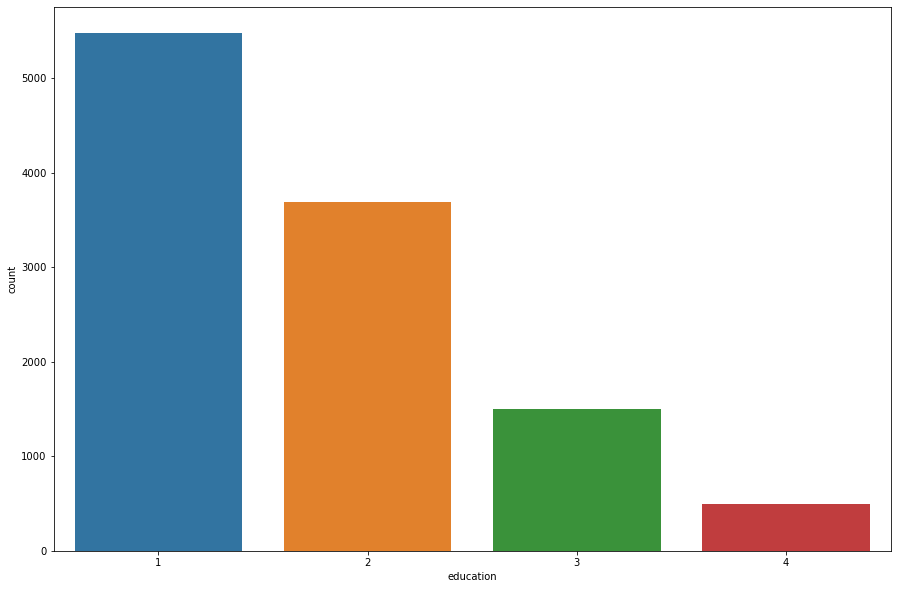

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(data = bank, x = col[3])

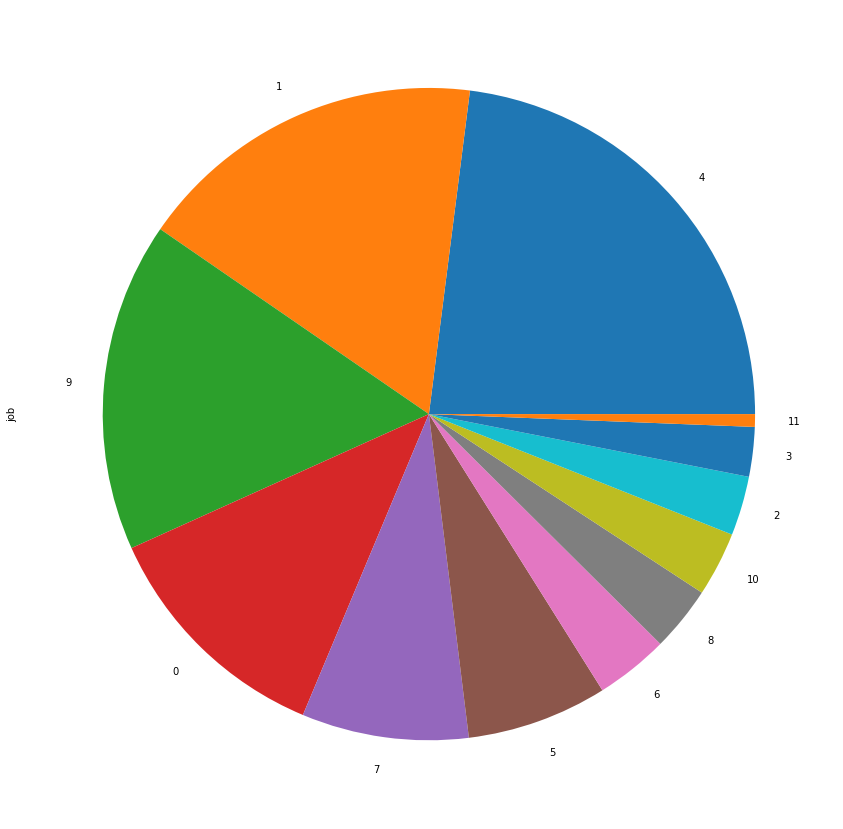

In [40]:
bank['job'].value_counts().plot(kind='pie')
plt.show()